In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.chdir('/content/gdrive/My Drive/IITbombay/credit seminar/koyna')
df = pd.read_excel('koynapmp.xlsx',index_col='Date',parse_dates=True)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41273 entries, 1901-01-01 to 2013-12-31
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   17/73.25     41273 non-null  float64
 1   17/73.5      41273 non-null  float64
 2   17.25/73.25  41273 non-null  float64
 3   17.25/73.5   41273 non-null  float64
 4   17.5/73      41273 non-null  float64
 5   17.5/73.25   41273 non-null  float64
 6   17.5/73.5    41273 non-null  float64
 7   17.75/73     41273 non-null  float64
 8   17.75/73.25  41273 non-null  float64
 9   17.75/73.5   41273 non-null  float64
dtypes: float64(10)
memory usage: 3.5 MB


,17/73.25,17/73.5,17.25/73.25,17.25/73.5,17.5/73,17.5/73.25,17.5/73.5,17.75/73,17.75/73.25,17.75/73.5
Date,,,,,,,,,,
1901-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1901-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

17/73.25       0
17/73.5        0
17.25/73.25    0
17.25/73.5     0
17.5/73        0
17.5/73.25     0
17.5/73.5      0
17.75/73       0
17.75/73.25    0
17.75/73.5     0
dtype: int64

In [ ]:
grid_1=df['17.75/73.5'].truncate(before = '1979-01-01')
grid_2=df['17.5/73.5'].truncate(before = '1961-01-01')

Text(0, 0.5, 'Precipitaion(mm)')

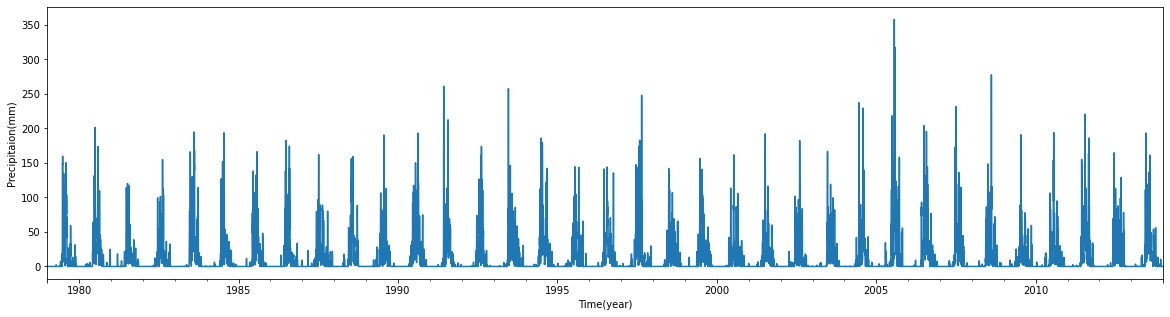

In [ ]:
grid_1.plot(figsize=(20,5))
plt.xlabel('Time(year)')
plt.ylabel('Precipitaion(mm)')

Text(0, 0.5, 'Precipitaion(mm)')

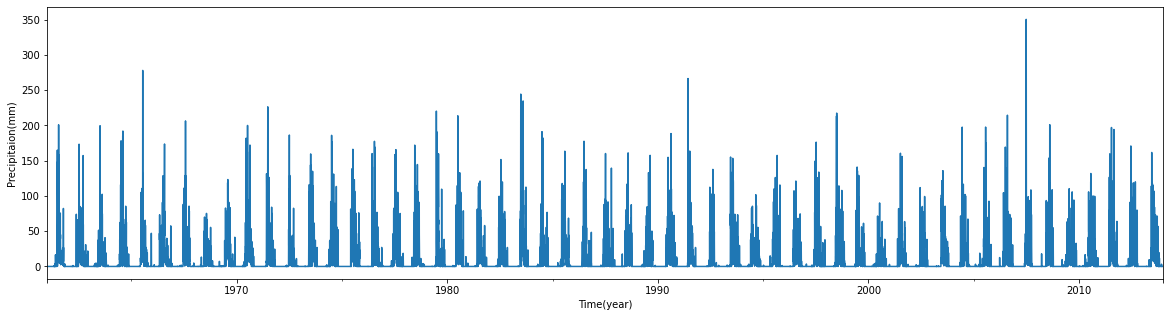

In [ ]:
grid_2.plot(figsize=(20,5))
plt.xlabel('Time(year)')
plt.ylabel('Precipitaion(mm)')

In [ ]:
all_data=[grid_1,grid_2]

63.6
55.7


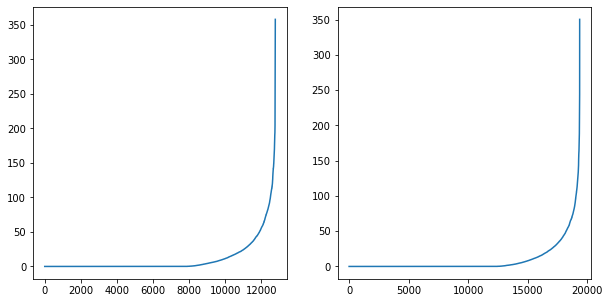

In [ ]:
plt.figure(figsize=(10,5))
for i in range(len(all_data)):
  dd = sorted(all_data[i],reverse=False)
  value = .95*len(dd)
  print(dd[int(value)])
  plt.subplot(1,2,i+1)
  plt.plot(dd)

In [ ]:
grid_1 = grid_1.loc[grid_1>63.6]
grid_2 = grid_2.loc[grid_2>55.7]

In [ ]:
grid_1.shape,grid_2.shape

((638,), (966,))

Text(0, 0.5, 'Precipitaion(mm)')

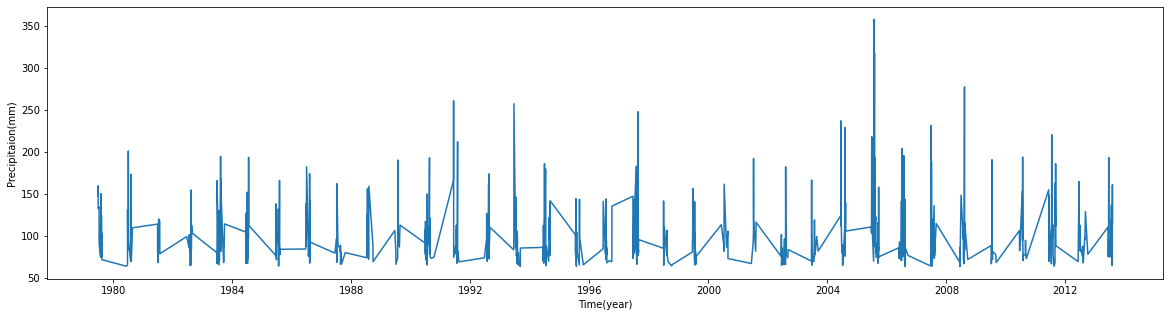

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(grid_1)
plt.xlabel('Time(year)')
plt.ylabel('Precipitaion(mm)')

Text(0, 0.5, 'Precipitaion(mm)')

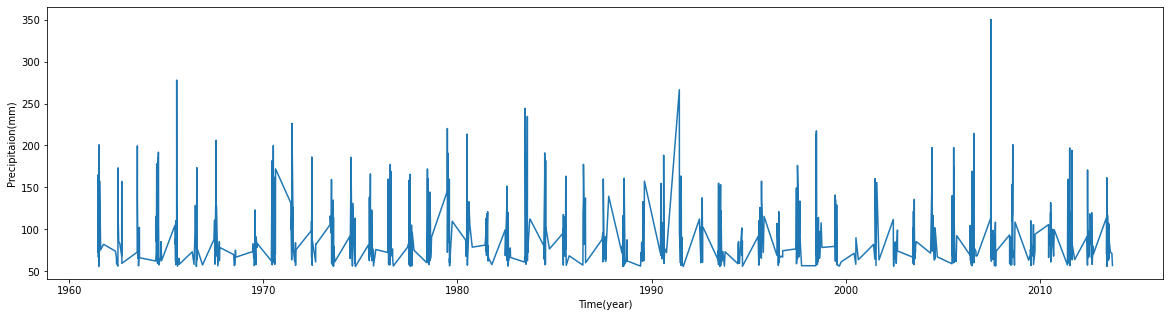

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(grid_2)
plt.xlabel('Time(year)')
plt.ylabel('Precipitaion(mm)')

In [ ]:
pip install pymannkendall

In [ ]:
import pymannkendall as mk
result = mk.original_test(grid_1)
print(result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.7854506518768414, z=0.27222287784909993, Tau=0.007209539229243663, s=1465.0, var_s=28922305.666666668, slope=0.0015151515151514828, intercept=92.16742424242426)


In [ ]:
import pymannkendall as mk
result = mk.original_test(grid_2)
print(result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.5986268206246734, z=-0.5263762402506601, Tau=-0.011313144316072903, s=-5273.0, var_s=100313237.66666667, slope=-0.0013020833333333333, intercept=81.22825520833332)


In [ ]:
#!/usr/bin/env python
"""PyMaxEnt.py: Implements a maximum entropy reconstruction of distributions with known moments."""

__author__     = "Tony Saad and Giovanna Ruai"
__copyright__  = "Copyright (c) 2019, Tony Saad"

__credits__    = ["University of Utah Department of Chemical Engineering", "University of Utah UROP office"]
__license__    = "MIT"
__version__    = "1.0.0"
__maintainer__ = "Tony Saad"
__email__      = "tony.saad@chemeng.utah.edu"
__status__     = "Production"

import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve

def moments_c(f, k=0, bnds=[-np.inf, np.inf]):
    '''
    Creates "k" moments: μ0, μ1, ..., μ(k-1) for a function "f" on the support given by "bnds".
    Parameters:
        f (function): distribution function **must be in the form of a function**
        k (int): integer number of moments to compute. Will evaluate the first k moments of f, μ0, μ1, ..., μ(k-1)
        bnds (tuple): boundaries for the integration
    Returns:
        moments: an array of moments of length "k"
    
    Example:
        μ = moments(3, f, [-1, 1])    
    '''
    def mom(x, k):
        return x**k*f(x)
    
    moms = np.zeros(k)
    a = bnds[0]
    b = bnds[1]
    for i in range(0,k):
        moms[i] = quad(mom,a,b,args = i)[0]
    return moms

def moments_d(f,k,x):
    '''
    Calculates the first "k" moments: μ0, μ1, ..., μ(k-1) of a discrete distribution "f".
    
    Parameters:
        f (array): an array of values for a discrete distribution        
        k (int): number of moments to compute. Will evaluate the first k moments of f, μ0, μ1, ..., μ(k-1)        
        x (array): list or array containing the values of the random variable over which the distribution is to be integrated
    Returns:
        mom: an array of length k containing the moments for the known distribution
    '''
    moms = []
    for i in range(0,k):
        xp = np.power(x,i)      # compute x^p
        xpf = np.dot(xp,f)      # compute x^p * f(x)
        moms.append(np.sum(xpf)) # compute moment: sum(x^p * f(x))
    return np.array(moms)

def moments(f, k, rndvar=None, bnds=None):
    '''
    Computes the first "k" moments of a function "f" on the support given by "bnd". If "rndvar" is provided, then a discrete distribution is assumed and "f" ##must## be a list or array of scalar values.
    Parameters:
        f (function): distribution function **must be in the form of a function**
        k (integer): will evaluate the first k moments of f, μ0, μ1, ..., μ(k-1)
        rndvar (array): optional - designates a list or array of discrete values for a random variable. If x is provided, then the moments will be computed based on a discrete distribution. This means that f must be an array as well.
        bnds (tuple): a list of two numbers consisting of the lower and upper bounds of the support    
    
    Returns:
        moments: an array of moments of length `k`    
    Example:
        μ = moments(3, f, [-1, 1])    
    '''    
    if rndvar is not None:
        if bnds is not None:
            print('WARNING: You specified BOTH x and boundaries. I will assume this is a discrete distribution. If you want to calculate a continuous distribution, please specify bnd ONLY.')
        return moments_d(f,k,rndvar)
    else:
        return moments_c(f,k,bnds)

def integrand(x, lamb, k=0, discrete=False):
    '''
    Calculates the integrand of the \(k^\mathrm{th}\) moment.
    Parameters:
        x (array): linear space or set of values for a random variable on which the integrand is applied
        lamb (array): an array of Lagrange multipliers used to approximate the distribution
        k (integer): a constant representing the order of the moment being calculated
    Returns:
        integrand: the caclulated portion of the integrand at each x value
    '''
    neqs = len(lamb)
    xi = np.array([x**i for i in range(0, neqs)])
    if discrete:
        return x**k * np.exp(np.dot(lamb, xi))
    else:
        return x**k * np.exp(np.dot(lamb, xi))

def residual_d(lamb,x,k,mu):
    '''
    Calculates the residual of the moment approximation function.
    Parameters:
        lamb (array): an array of Lagrange constants used to approximate the distribution
        x (array): 
        k (integer): order of the moment        
        mu (array): an array of the known moments needed to approximate the distribution function
    
    Returns:
        rhs: the integrated right hand side of the moment approximation function
    '''
    l_sum = []
    for i in range(0,len(lamb)):
        l_sum.append( np.sum(integrand(x,lamb,i,discrete=True)) - mu[i] )
    return np.array(l_sum)

def maxent_reconstruct_d(rndvar, mu):
    '''
    Computes the most likely distribution from the moments given using maximum entropy theorum.
    Parameters:
        rndvar (array): a list or array of known dependent variables. For example, for a 6-faced die, rndvar=[1,2,3,4,5,6]
        mu (array): vector of size m containing the known moments of a distribution. This does NOT assume that μ0 = 1. This vector contains moments μ_k starting with μ_0, μ_1, etc... For example, μ = [1,0,0]
    Returns:
        probabilites: vector of size b (from bnd[1]) containing the probabilities for the distribution 
        lambsol: vector of lagrangian multipliers
    '''
    lambguess = np.zeros(len(mu))
    lambguess[0] = -np.log(np.sqrt(2*np.pi))
    k = len(mu)
    lambsol = fsolve(residual_d, lambguess, args = (rndvar,k,mu))
    probabilites = integrand(rndvar, lambsol, k=0, discrete=True)    
    return probabilites, lambsol


def residual_c(lamb, mu, bnds):
    '''
    Calculates the residual of the moment approximation function.
    
    Parameters:
        lamb (array): an array of Lagrange constants used to approximate the distribution
        mu (array): an array of the known moments needed to approximate the distribution function
        bnds (tuple): support bounds
    Returns:
        rhs: the integrated right hand side of the moment approximation function
    '''
    a = bnds[0]
    b = bnds[1]
    neqs = len(lamb)
    rhs = np.zeros(neqs)
    for k in range(0, neqs):
        rhs[k] = quad(integrand, a, b, args=(lamb, k))[0] - mu[k]
    return rhs

def maxent_reconstruct_c(mu, bnds=[-np.inf, np.inf]):
    '''
    Used to construct a continuous distribution from a limited number of known moments(μ). This function applies Maximum Entropy Theory in order to solve for the constraints found in the approximation equation that is given as an output.
    
    Parameters:
        μ: vector of size m containing the known moments of a distribution. This does NOT assume that μ0 = 1. This vector contains moments μ_k starting with μ_0, μ_1, etc...
            Ex. μ = [1,0,0]
        bnds: Support for the integration [a,b]
            ## It is important the bounds include roughly all non-zero values of the distribution that is being recreated ##
    
    Returns:
        Distribution Function: The recreated probability distribution function from the moment vector (μ) input given. requires a support to be ploted
    
    Example:
        >>> f, sol = maxent([1,0,0], [-1,1])        
    '''
    neqs = len(mu)
    lambguess = np.zeros(neqs) # initialize guesses
    lambguess[0] = -np.log(np.sqrt(2*np.pi)) # set the first initial guess - this seems to work okay
    lambsol = fsolve(residual_c, lambguess, args=(mu,bnds), col_deriv=True)
    recon = lambda x: integrand(x, lambsol, k=0)
    return recon, lambsol

def reconstruct(mu, rndvar=None, bnds=None):
    '''
    This is the main function call to generate maximum entropy solutions.
    
    Parameters:
        mu (array): a list or array of known moments
        rndvar (array): optional - a list or array of known dependent variables. For example, for a 6-faced die, rndvar=[1,2,3,4,5,6]. If rndvar is provided, we will assume a discrete reconstruction.
        bnds (tuple): a tuple [a,b] containing the bounds or support of the reconstructed solution. This is only required for continuous distributions and will be neglected if rndvar is provided.
    
    Returns:
        recon: reconstructed distribution. If continuous, then `recon` is a Python function, `f(x)`. If discrete, then recon is an array of probabilities.
        lambsol (array): array containing the lagrangian multipliers
    
    Examples:
        ### reconstruct a discrete distribution
        >>> from pymaxent import *
        >>> mu = [1,3.5]
        >>> x = [1,2,3,4,5,6]
        >>> sol, lambdas = reconstruct(mu,rndvar=x)
        
        ### reconstruct a continuous distribution
        >>> from pymaxent import *
        >>> mu = [1,0,0.04]
        >>> sol, lambdas = reconstruct(mu,bnds=[-1,1])
        >>> x = np.linspace(-1,1)
        >>> plot(x,sol(x))              
    '''
    result = 0
    # Discrete case
    if rndvar is not None:
        rndvar = np.array(rndvar) # convert things to numpy arrays
        if bnds is not None:
            print('WARNING: You specified BOTH x and boundaries. I will assume this is a discrete distribution. If you want to calculate a continuous distribution, please specify bnd ONLY.')
        result = maxent_reconstruct_d(rndvar, mu)
    # Continuous case
    else:
        result = maxent_reconstruct_c(mu, bnds)
    return result

# Grid 1

**Log normal**

[-9.03845962e+00  1.14725813e-01 -8.31029655e-04  1.45388879e-06]
[5.90356632e+00 5.44601157e+02 5.30988552e+04 5.51340904e+06]


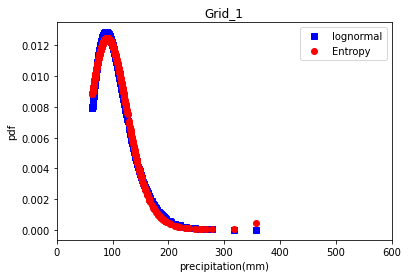

In [ ]:
   # mu =  4.59228   [4.56683, 4.61773]
   # sigma = 0.332208   [0.315165, 0.351214]
σ =  0.332208 
μ = 4.59228
x = grid_1
A = 1/(x*σ*np.sqrt(2*np.pi))
ln = A*np.exp(-(np.log(x)-μ)**2/(2*σ**2))
mu = moments(ln,4,grid_1)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_1)
print(lambdas)
print(mu)
plt.plot(x,ln,'bs',x,sol,'ro')
plt.legend(["lognormal","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.xlim(0,600)
plt.title('Grid_1')
plt.show()

In [ ]:
AIC_score = []
ztstats1=[]
zpvalue1=[]
kststats1=[]
kspvalue1=[]
BIC_score = []

In [ ]:
pip install RegscorePy

In [ ]:
from statsmodels.stats import weightstats

In [ ]:
pip install RegscorePy

In [ ]:
tstats,pvalue  = weightstats.ztest(ln,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

-4.8674915331921826e-11 0.9999999999611631


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(ln,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.20532915360501566 3.5089234193649116e-12


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, ln, 2))

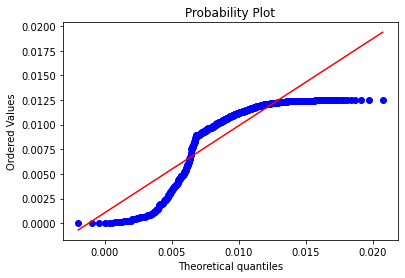

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.lognorm.fit(sol)
stats.probplot(sol,dist=stats.lognorm,plot=pylab,sparams=param)
pylab.show()

**Gamma Distribution**

[-9.03274039e+00  1.08353045e-01 -7.52912660e-04  1.25272421e-06]
[5.53184259e+00 5.18711246e+02 5.15565150e+04 5.46631457e+06]


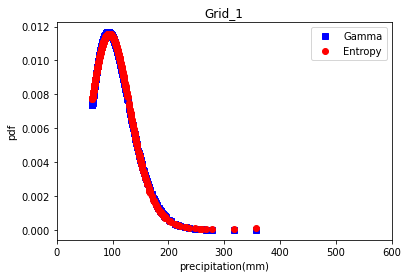

In [ ]:
# a = 8.47278   [7.62004, 9.42096]
#     b =  12.374   [11.093, 13.8029]
import math
a = 8.47278 
b = 12.374 
A = 1/((b**a)*math.gamma(a))
x=grid_1
gma = A*(x**(a-1))*np.exp(-x/b)
mu = moments(gma,4,grid_1)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_1)
print(lambdas)
print(mu)
plt.plot(x,gma,'bs',x,sol,'ro')
plt.legend(["Gamma","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.title('Grid_1')
plt.xlim(0,600)
plt.show()

In [ ]:
tstats,pvalue  = weightstats.ztest(gma,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

-1.9184787292385855e-13 0.9999999999998469


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(gma,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.10344827586206896 0.0021521406234920855


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, gma, 2))

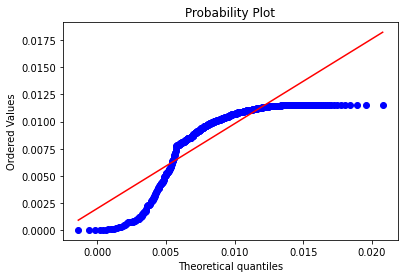

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.gamma.fit(sol)
stats.probplot(sol,dist=stats.gamma,plot=pylab,sparams=param)
pylab.show()

**GEV Distribution**

[-7.92515640e+00  1.11001973e-01 -9.30027458e-04  1.77215409e-06]
[7.32210037e+00 6.36220858e+02 5.79172419e+04 5.59967875e+06]


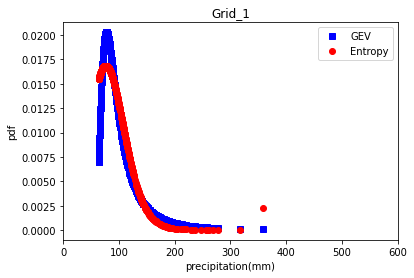

In [ ]:
from scipy.stats import genextreme as gev
x = grid_1
shape, loc, scale = gev.fit(x)
gev_ = gev.pdf(x, shape, loc, scale)
mu = moments(gev_,4,grid_1)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_1)
print(lambdas)
print(mu)
plt.plot(x,gev_,'bs',x,sol,'ro')
plt.legend(["GEV","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.title('Grid_1')
plt.xlim(0,600)
plt.show()

In [ ]:
tstats,pvalue  = weightstats.ztest(gev_,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

-1.768910669092301e-08 0.9999999858861349


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(gev_,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.3213166144200627 1.5994158503313488e-29


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, gev_, 3))

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2552: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


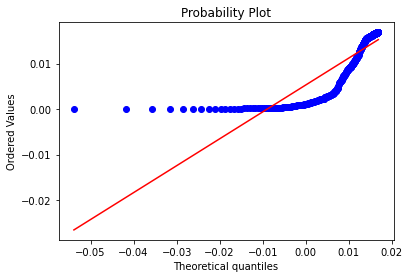

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.genextreme.fit(sol)
stats.probplot(sol,dist=stats.genextreme,plot=pylab,sparams=param)
pylab.show()

**EVD or Gumbell dsitribution**

[ 1.15003623e+01 -4.89855755e-01  5.42732646e-03 -2.03144143e-05]
[1.65160815e+01 1.38866636e+03 1.20843517e+05 1.09018830e+07]


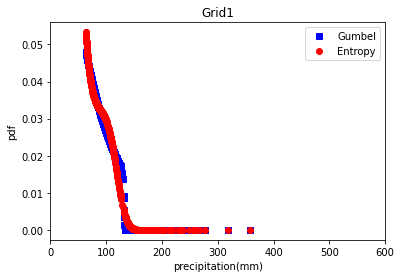

In [ ]:
#extreme value distribution: Gumbel distribution
  # mu =  127.83   [122.923, 132.737]
  #   sigma = 60.3111   [57.6615, 63.0825]
σ = 60.3111
μ = 127.83
x = grid_1
gb = (1/σ)*(np.exp(-(x-μ)/σ))*(np.exp(-np.exp(x-μ)/σ))
mu = moments(gb,4,grid_1)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_1)
print(lambdas)
print(mu)
plt.plot(x,gb,'bs',x,sol,'ro')
plt.legend(["Gumbel","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.title('Grid1')
plt.xlim(0,600)
plt.show()

In [ ]:
tstats,pvalue  = weightstats.ztest(gb,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

-2.3284256717422133e-12 0.9999999999981422


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(gb,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.19435736677115986 5.968179810952308e-11


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, gb, 2))

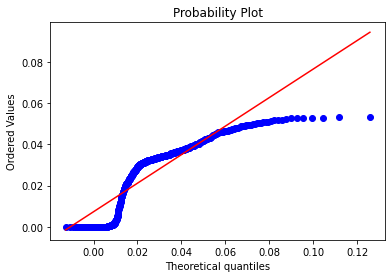

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.gumbel_r.fit(sol)
stats.probplot(sol,dist=stats.gumbel_r,plot=pylab,sparams=param)
pylab.show()

**Weibull Distribution**

[-6.92521891e+00  4.51947177e-02 -2.37043701e-04  5.33738409e-08]
[4.60485255e+00 4.43355935e+02 4.57315004e+04 5.08230857e+06]


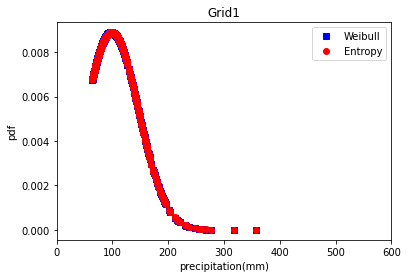

In [ ]:
  #  A = 117.855   [114.247, 121.576]
  #   B = 2.61765   [2.48528, 2.75706]
a=117.855
b= 2.61765 
x = grid_1
r = (x/a)**(b-1)
A = (b/a)*r
wb = A*(np.exp(-((x/a)**b)))
mu = moments(wb,4,grid_1)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_1)
print(lambdas)
print(mu)
plt.plot(x,wb,'bs',x,sol,'ro')
plt.legend(["Weibull","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.title('Grid1')
plt.xlim(0,600)
plt.show()

In [ ]:
import math
from sympy import symbols, Eq, solve
predict_1 = []
y = symbols('y')
for i in sol:
  eq = Eq(math.log(i) - (lambdas[0]) - (lambdas[1])*y - lambdas[2]*(y**2) - lambdas[3]*(y**3))
  predict_1.append(solve(eq))

/usr/local/lib/python3.7/dist-packages/sympy/core/relational.py:496: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


In [ ]:
predict_1

[[49.1748498861718 + 0.e-17*I, 148.8 + 0.e-17*I, 3663.52610782931 + 0.e-21*I],
 [50.147555444506 + 0.e-17*I, 147.8 + 0.e-17*I, 3663.55340227097 + 0.e-21*I],
 [38.6071950131155 + 0.e-17*I, 159.7 + 0.e-17*I, 3663.19376270236 + 0.e-19*I],
 [64.8030506727926 + 0.e-19*I,
  132.799999999999 - 0.e-19*I,
  3663.89790704269 + 0.e-21*I],
 [62.9399309153841 + 0.e-19*I,
  134.699999999999 - 0.e-19*I,
  3663.86102680009 + 0.e-21*I],
 [90.7000000000018 + 0.e-17*I,
  106.596565092325 + 0.e-17*I,
  3664.20439262315 + 0.e-22*I],
 [75.5000000000006 + 0.e-19*I,
  121.930001336161 - 0.e-19*I,
  3664.07095637932 - 0.e-21*I],
 [91.0000000000008 + 0.e-17*I,
  106.295250002666 + 0.e-17*I,
  3664.20570771281 + 0.e-19*I],
 [81.5610443590947 + 0.e-17*I,
  115.799999999999 + 0.e-17*I,
  3664.13991335638 + 0.e-19*I],
 [74.5000000000004 + 0.e-17*I,
  122.943395375353 + 0.e-17*I,
  3664.05756234012 + 0.e-21*I],
 [54.043771325187 + 0.e-17*I, 143.8 + 0.e-17*I, 3663.65718639029 + 0.e-19*I],
 [47.7168011375527 + 0.e-17*

Text(0, 0.5, 'Difference btw observed and predicted rainfall')

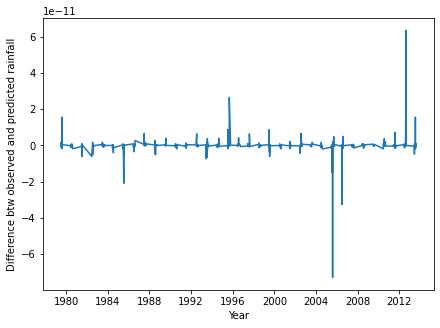

In [ ]:
v=[]
for i in range(len(predict_1)):
  for j in range(3):
    v.append(complex(predict_1[i][j]).real)
for i in v:
  if i>1000:
    v.remove(i)
rr = np.array(v).reshape(grid_1.shape[0],2)
ff=[]
for i in range(len(rr)):
  diff0=abs(rr[i][0]-grid_1[i])
  diff1=abs(rr[i][1]-grid_1[i])
  if diff0<diff1:
    ff.append(rr[i][0])

  else:
    ff.append(rr[i][1])


plt.figure(figsize=(7,5))
plt.plot(ff-grid_1)
plt.xlabel('Year')
plt.ylabel('Difference btw observed and predicted rainfall')

Text(0, 0.5, 'predicted rainfall values')

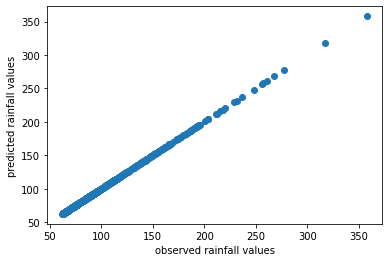

In [ ]:
cd = 1-(np.exp(-((x/a)**b)))
l=[]
for i in cd:
  l.append(a*((-math.log(1-i))**(1/b)))
plt.scatter(x,l)
plt.xlabel('observed rainfall values')
plt.ylabel('predicted rainfall values')

Text(0, 0.5, 'Difference btw observed and predicted')

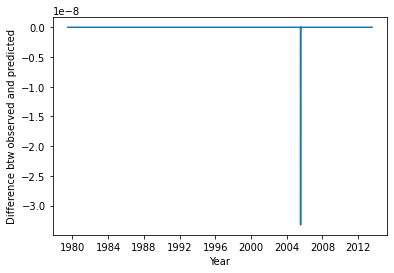

In [ ]:
plt.plot(x-l)
plt.xlabel("Year")
plt.ylabel('Difference btw observed and predicted')

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ff, grid_1)
rmse = math.sqrt(mse)
print(rmse)
mse = mean_squared_error(l, grid_1)
rmse = math.sqrt(mse)
print(rmse)

4.541293529259967e-12
1.2970961071473655e-09


In [ ]:
mse = mean_squared_error(l, grid_1)
rmse = math.sqrt(mse)
print(rmse)

1.2970961071473655e-09


In [ ]:
tstats,pvalue  = weightstats.ztest(wb,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

4.3799593783154e-12 0.9999999999965054


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(wb,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.02037617554858934 0.9993933939530979


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, wb, 2))

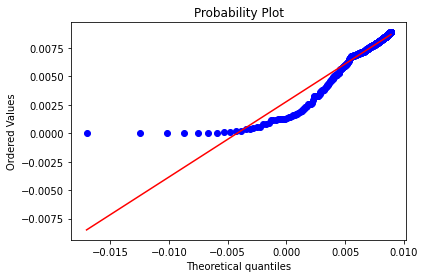

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.weibull_max.fit(sol)
stats.probplot(sol,dist=stats.weibull_max,plot=pylab,sparams=param)
pylab.show()

In [ ]:
dist = ['lognormal','gamma','GEV','Gumbell','weibull']

Text(0.5, 0, 'AIC value')

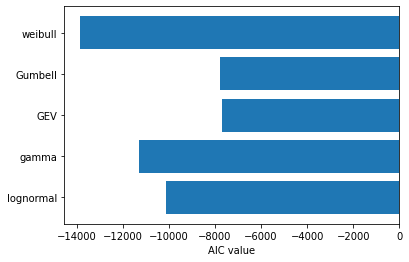

In [ ]:
  plt.barh(dist,AIC_score)
  plt.xlabel('AIC value')

Text(0.5, 0, 'AIC value')

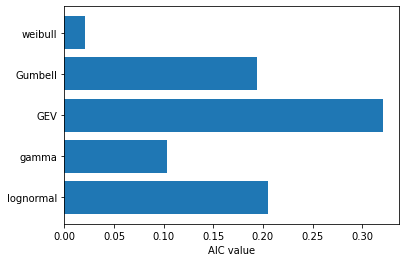

In [ ]:
  plt.barh(dist,kststats1)
  plt.xlabel('AIC value')

# Grid 2

**Log normal**

[-8.48987813e+00  1.16255797e-01 -9.37995012e-04  1.75976419e-06]
[9.81533585e+00 7.92202562e+02 6.79328888e+04 6.23979155e+06]


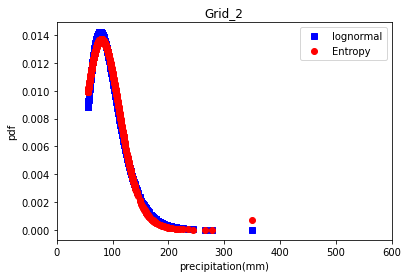

In [ ]:
    #    mu =  4.47097   [4.44947, 4.49247]
    # sigma =   [0.32597, 0.356409]

σ =   0.340506 
μ =  4.47097
x = grid_2
A = 1/(x*σ*np.sqrt(2*np.pi))
ln = A*np.exp(-(np.log(x)-μ)**2/(2*σ**2))
mu = moments(ln,4,grid_2)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_2)
print(lambdas)
print(mu)
plt.plot(x,ln,'bs',x,sol,'ro')
plt.legend(["lognormal","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.xlim(0,600)
plt.title('Grid_2')
plt.show()

In [ ]:
AIC_score = []
ztstats1=[]
zpvalue1=[]
kststats1=[]
kspvalue1=[]
BIC_score = []

In [ ]:
pip install RegscorePy

In [ ]:
from statsmodels.stats import weightstats

In [ ]:
pip install RegscorePy

In [ ]:
tstats,pvalue  = weightstats.ztest(ln,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

4.913963002895601e-13 0.9999999999996079


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(ln,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.21842650103519667 1.3602058827408344e-20


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, ln, 2))

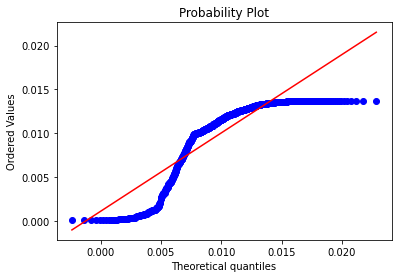

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.lognorm.fit(sol)
stats.probplot(sol,dist=stats.lognorm,plot=pylab,sparams=param)
pylab.show()

**Gamma Distribution**

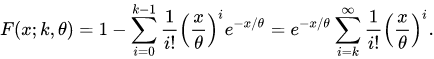

[-8.56584123e+00  1.11879534e-01 -8.68943783e-04  1.57297825e-06]
[9.17366627e+00 7.53274287e+02 6.59154296e+04 6.18694010e+06]


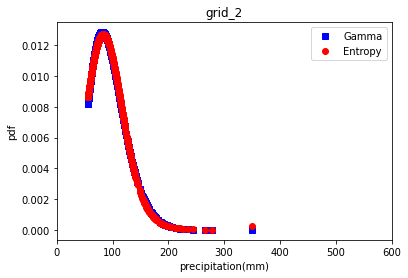

In [ ]:
    # a = 8.06039   [7.38583, 8.79655]
    # b = 11.5573   [10.5607, 12.648]
import math
a = 8.06039
b = 11.5573 
A = 1/((b**a)*math.gamma(a))
x=grid_2
gma = A*(x**(a-1))*np.exp(-x/b)
mu = moments(gma,4,grid_2)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_2)
print(lambdas)
print(mu)
plt.plot(x,gma,'bs',x,sol,'ro')
plt.legend(["Gamma","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.title('grid_2')
plt.xlim(0,600)
plt.show()

In [ ]:
import math
from sympy import symbols, Eq, solve
predict_1 = []
y = symbols('y')
for i in sol:
  eq = Eq(math.log(i) - (lambdas[0]) - (lambdas[1])*y - lambdas[2]*(y**2) - lambdas[3]*(y**3))
  predict_1.append(solve(eq))

/usr/local/lib/python3.7/dist-packages/sympy/core/relational.py:496: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


In [ ]:
x.shape

(966,)

In [ ]:
predict_1

[[73.4000000000004 + 0.e-21*I,
  93.2257169165345 - 0.e-21*I,
  385.793736166377 + 0.e-22*I],
 [19.6365978351087 + 0.e-21*I, 164.9 - 0.e-21*I, 367.882855247803 + 0.e-19*I],
 [29.7203456033115 + 0.e-20*I, 148.6 - 0.e-20*I, 374.0991074796 + 0.e-19*I],
 [61.4805145032925 + 0.e-18*I, 106.5 + 0.e-18*I, 384.438938579619 + 0.e-21*I],
 [80.1000000000008 + 0.e-21*I,
  86.2321468912395 - 0.e-21*I,
  386.087306191671 + 0.e-20*I],
 [66.8000000000004 + 0.e-20*I,
  100.436915665325 - 0.e-20*I,
  385.182537417586 - 0.e-21*I],
 [71.7000000000004 + 0.e-21*I,
  95.0515800498582 - 0.e-21*I,
  385.667873033053 + 0.e-22*I],
 [68.9964504080549 + 0.e-21*I, 98.0 - 0.e-21*I, 385.423002674857 + 0.e-19*I],
 [74.5000000000001 + 0.e-18*I,
  92.0555922526633 + 0.e-18*I,
  385.863860830248 + 0.e-19*I],
 [78.3999999999998 + 0.e-20*I,
  87.9768103630116 - 0.e-20*I,
  386.0426427199 + 0.e-22*I],
 [55.8 + 0.e-21*I, 113.242482974356 - 0.e-21*I, 383.376970108556 + 0.e-19*I],
 [1.48726489831181 + 0.e-19*I, 200.8 + 0.e-18*I

In [ ]:
v=[]
for i in range(len(predict_1)):
  for j in range(3):
    v.append(complex(predict_1[i][j]).real)

Text(0, 0.5, 'Difference btw observed and predicted rainfall')

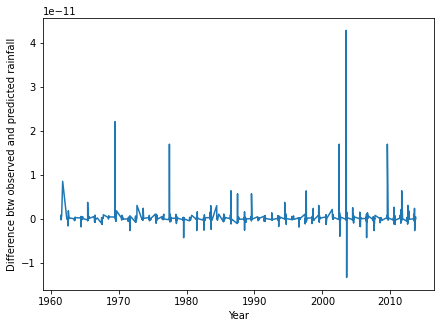

In [ ]:
rr = np.array(v).reshape(grid_2.shape[0],3)
ff = []
for i in range(len(rr)):
  diff0=abs(rr[i][0]-grid_2[i])
  diff1=abs(rr[i][1]-grid_2[i])
  diff2=abs(rr[i][2]-grid_2[i])
  oo = [diff0,diff1,diff2]
  ff.append(rr[i][oo.index(min([diff0,diff1,diff2]))])

plt.figure(figsize=(7,5))
plt.plot(ff-grid_2)
plt.xlabel('Year')
plt.ylabel('Difference btw observed and predicted rainfall')

In [ ]:
tstats,pvalue  = weightstats.ztest(gma,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

6.443210431234246e-13 0.9999999999994859


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(gma,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.12318840579710146 8.349166994252569e-07


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, gma, 2))

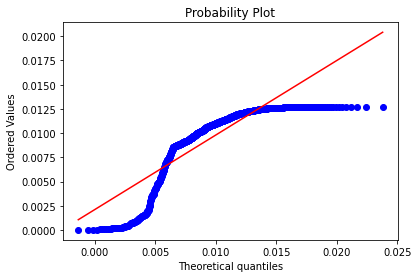

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.gamma.fit(sol)
stats.probplot(sol,dist=stats.gamma,plot=pylab,sparams=param)
pylab.show()

**GEV Distribution**

[-6.49697194e+00  9.10934658e-02 -9.16786195e-04  1.89015777e-06]
[1.25890941e+01 9.41461769e+02 7.40240921e+04 6.22072250e+06]


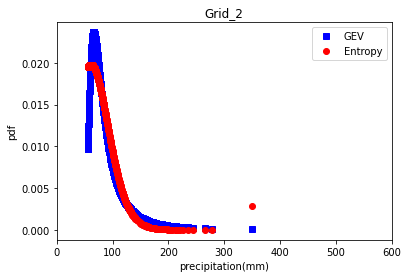

In [ ]:
from scipy.stats import genextreme as gev
x = grid_2
shape, loc, scale = gev.fit(x)
gev_ = gev.pdf(x, shape, loc, scale)
mu = moments(gev_,4,grid_2)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_2)
print(lambdas)
print(mu)
plt.plot(x,gev_,'bs',x,sol,'ro')
plt.legend(["GEV","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.title('Grid_2')
plt.xlim(0,600)
plt.show()

In [ ]:
import math
from sympy import symbols, Eq, solve
predict_1 = []
y = symbols('y')
for i in sol:
  eq = Eq(math.log(i) - (lambdas[0]) - (lambdas[1])*y - lambdas[2]*(y**2) - lambdas[3]*(y**3))
  predict_1.append(solve(eq))

/usr/local/lib/python3.7/dist-packages/sympy/core/relational.py:496: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


In [ ]:
predict_1

[[49.6738082287367 + 0.e-18*I,
  73.4000000000001 + 0.e-18*I,
  361.957764021763 + 0.e-22*I],
 [-13.7650920060405 + 0.e-19*I, 164.9 + 0.e-18*I, 333.896664256541 - 0.e-21*I],
 [-5.26823151918314 + 0.e-21*I, 148.6 - 0.e-21*I, 341.699803769684 + 0.e-19*I],
 [22.1084581908128 + 0.e-18*I, 106.5 - 0.e-21*I, 356.423114059687 + 0.e-21*I],
 [43.6141713129531 + 0.e-21*I,
  80.0999999999997 - 0.e-21*I,
  361.317400937547 + 0.e-19*I],
 [55.9044840845432 + 0.e-18*I,
  66.8000000000003 + 0.e-18*I,
  362.327088165957 + 0.e-22*I],
 [51.2532933036554 + 0.e-18*I,
  71.6999999999996 + 0.e-18*I,
  362.078278946845 + 0.e-19*I],
 [28.6404526149995 + 0.e-18*I,
  97.9999999999997 + 0.e-18*I,
  358.391119635501 + 0.e-19*I],
 [48.6609741743623 + 0.e-18*I,
  74.4999999999996 + 0.e-18*I,
  361.870598076138 + 0.e-19*I],
 [45.1271449652053 + 0.e-18*I,
  78.3999999999997 + 0.e-18*I,
  361.504427285295 + 0.e-19*I],
 [55.8000000000007 + 0.e-18*I,
  66.9083745792106 + 0.e-18*I,
  362.323197671289 - 0.e-22*I],
 [-28.404

In [ ]:
v=[]
for i in range(len(predict_1)):
  for j in range(3):
    v.append(complex(predict_1[i][j]).real)
# for i in v:
#   if i>351:
#     v.remove(i)

In [ ]:
rr = np.array(v).reshape(grid_2.shape[0],3)

In [ ]:
rr

array([[ 49.67380823,  73.4       , 361.95776402],
       [-13.76509201, 164.9       , 333.89666426],
       [ -5.26823152, 148.6       , 341.69980377],
       ...,
       [ 50.0438946 ,  73.        , 361.98767765],
       [ 51.62746415,  71.3       , 362.1041081 ],
       [ 56.9       ,  65.77125052, 362.36032173]])

In [ ]:
ff = []
for i in range(len(rr)):
  diff0=abs(rr[i][0]-grid_2[i])
  diff1=abs(rr[i][1]-grid_2[i])
  diff2=abs(rr[i][2]-grid_2[i])
  oo = [diff0,diff1,diff2]
  ff.append(rr[i][oo.index(min([diff0,diff1,diff2]))])

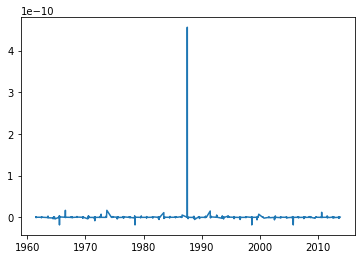

In [ ]:
plt.plot(ff-grid_2)

In [ ]:
tstats,pvalue  = weightstats.ztest(gev_,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

5.785420326236112e-09 0.9999999953839025


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(gev_,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.2971014492753623 5.304311099984728e-38


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, gev_, 3))

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2552: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


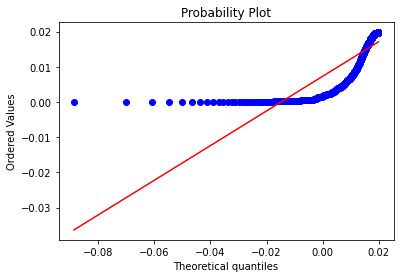

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.genextreme.fit(sol)
stats.probplot(sol,dist=stats.genextreme,plot=pylab,sparams=param)
pylab.show()

**EVD or Gumbell dsitribution**

[ 9.53004783e+00 -4.73737178e-01  5.88409755e-03 -2.47109510e-05]
[2.77733584e+01 2.04242785e+03 1.56433328e+05 1.25161414e+07]


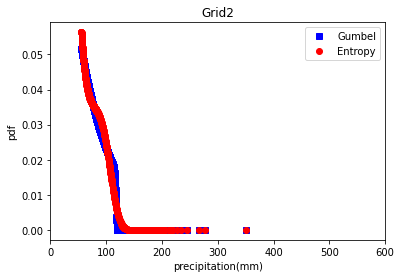

In [ ]:
#extreme value distribution: Gumbel distribution
     #  mu = 113.885   [110.17, 117.599]
  #  sigma = 55.4353   [53.4655, 57.4777]
σ =  55.4353 
μ = 113.885
x = grid_2
gb = (1/σ)*(np.exp(-(x-μ)/σ))*(np.exp(-np.exp(x-μ)/σ))
mu = moments(gb,4,grid_2)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_2)
print(lambdas)
print(mu)
plt.plot(x,gb,'bs',x,sol,'ro')
plt.legend(["Gumbel","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.title('Grid2')
plt.xlim(0,600)
plt.show()

In [ ]:
tstats,pvalue  = weightstats.ztest(gb,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

-6.094630795210328e-11 0.9999999999513719


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(gb,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.16459627329192547 7.749433711728069e-12


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, gb, 2))

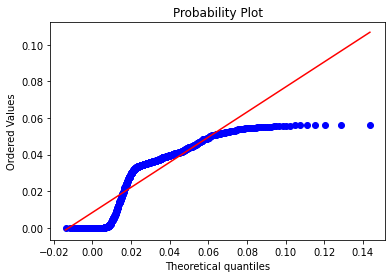

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.gumbel_r.fit(sol)
stats.probplot(sol,dist=stats.gumbel_r,plot=pylab,sparams=param)
pylab.show()

**Weibull Distribution**

[-6.62923177e+00  4.64742005e-02 -2.71992229e-04  3.48649277e-08]
[4.92688492e+00 4.54205539e+02 4.43967744e+04 4.62969864e+06]


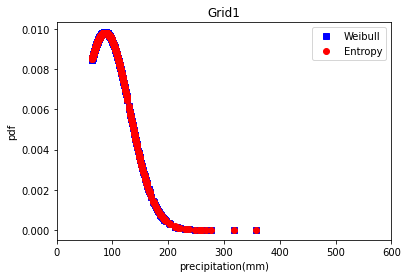

In [ ]:
    # A = 104.859   [102.158, 107.632]
    # B = 2.57094   [2.4626, 2.68404]
a=104.859 
b=  2.57094  
x = grid_1
r = (x/a)**(b-1)
A = (b/a)*r
wb = A*(np.exp(-((x/a)**b)))
mu = moments(wb,4,grid_1)
sol, lambdas = reconstruct(mu=mu,rndvar=grid_1)
print(lambdas)
print(mu)
plt.plot(x,wb,'bs',x,sol,'ro')
plt.legend(["Weibull","Entropy"])
plt.xlabel("precipitation(mm)")
plt.ylabel("pdf")
plt.title('Grid1')
plt.xlim(0,600)
plt.show()

In [ ]:
import math
from sympy import symbols, Eq, solve
predict_1 = []
y = symbols('y')
for i in sol:
  eq = Eq(math.log(i) - (lambdas[0]) - (lambdas[1])*y - lambdas[2]*(y**2) - lambdas[3]*(y**3))
  predict_1.append(solve(eq))

/usr/local/lib/python3.7/dist-packages/sympy/core/relational.py:496: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


In [ ]:
predict_1

[[25.4731236507461 + 0.e-17*I, 148.8 + 0.e-17*I, 7627.04033054356 - 0.e-21*I],
 [26.4570292443698 + 0.e-19*I, 147.8 - 0.e-19*I, 7627.05642494994 + 0.e-19*I],
 [14.7653228225736 + 0.e-19*I, 159.7 - 0.e-19*I, 7626.84813137173 + 0.e-21*I],
 [41.2467491780995 + 0.e-19*I, 132.8 - 0.e-19*I, 7627.26670501621 - 0.e-21*I],
 [39.3701497575972 + 0.e-19*I, 134.7 - 0.e-19*I, 7627.24330443671 + 0.e-19*I],
 [83.0707778380528 + 0.e-17*I,
  90.6999999999994 + 0.e-17*I,
  7627.54267635626 + 0.e-22*I],
 [75.5000000000012 + 0.e-17*I,
  98.2860616607479 + 0.e-17*I,
  7627.52739253356 + 0.e-19*I],
 [82.7710931248211 + 0.e-19*I,
  90.9999999999993 - 0.e-19*I,
  7627.54236106949 + 0.e-20*I],
 [58.0793064663212 + 0.e-19*I, 115.8 - 0.e-19*I, 7627.43414772799 + 0.e-19*I],
 [74.5000000000008 + 0.e-19*I,
  99.2892212395395 - 0.e-19*I,
  7627.52423295477 + 0.e-19*I],
 [30.3952426421033 + 0.e-19*I, 143.8 - 0.e-19*I, 7627.1182115522 + 0.e-21*I],
 [23.9977506750667 + 0.e-19*I, 150.3 - 0.e-19*I, 7627.01570351924 + 0.e-

Text(0, 0.5, 'Difference btw observed and predicted rainfall')

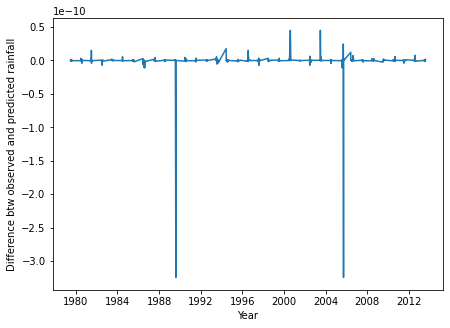

In [ ]:
v=[]
for i in range(len(predict_1)):
  for j in range(3):
    v.append(complex(predict_1[i][j]).real)
for i in v:
  if i>1000:
    v.remove(i)
rr = np.array(v).reshape(grid_1.shape[0],2)
ff=[]
for i in range(len(rr)):
  diff0=abs(rr[i][0]-grid_1[i])
  diff1=abs(rr[i][1]-grid_1[i])
  if diff0<diff1:
    ff.append(rr[i][0])

  else:
    ff.append(rr[i][1])


plt.figure(figsize=(7,5))
plt.plot(ff-grid_1)
plt.xlabel('Year')
plt.ylabel('Difference btw observed and predicted rainfall')

Text(0, 0.5, 'predicted rainfall values')

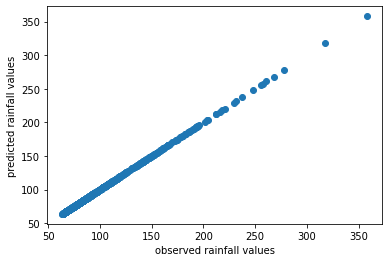

In [ ]:
cd = 1-(np.exp(-((x/a)**b)))
l=[]
for i in cd:
  l.append(a*((-math.log(1-i))**(1/b)))
plt.scatter(x,l)
plt.xlabel('observed rainfall values')
plt.ylabel('predicted rainfall values')

Text(0, 0.5, 'Difference btw observed and predicted')

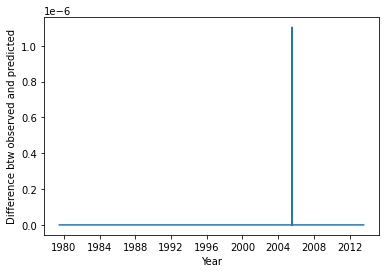

In [ ]:
plt.plot(x-l)
plt.xlabel("Year")
plt.ylabel('Difference btw observed and predicted')

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ff, grid_1)
rmse = math.sqrt(mse)
print(rmse)
mse = mean_squared_error(l, grid_1)
rmse = math.sqrt(mse)
print(rmse)

1.8466524446877316e-11
4.369619558593241e-08


In [ ]:
mse = mean_squared_error(l, grid_1)
rmse = math.sqrt(mse)
print(rmse)

4.369619558593241e-08


In [ ]:
tstats,pvalue  = weightstats.ztest(wb,sol)
print(tstats,pvalue)
ztstats1.append(tstats)
zpvalue1.append(pvalue)
# failed to reject null hypothesis

-5.3555274343238485e-14 0.9999999999999573


In [ ]:
from scipy import stats
tstats,pvalue = stats.ks_2samp(wb,sol)
print(tstats,pvalue)
kststats1.append(tstats)
kspvalue1.append(pvalue)

0.07210031347962383 0.07252759260106834


In [ ]:
from RegscorePy import aic
AIC_score.append(aic.aic(sol, wb, 2))

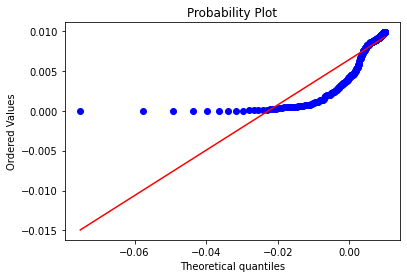

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
param = stats.weibull_max.fit(sol)
stats.probplot(sol,dist=stats.weibull_max,plot=pylab,sparams=param)
pylab.show()

In [ ]:
dist = ['lognormal','gamma','GEV','Gumbell','weibull']

Text(0.5, 0, 'AIC value')

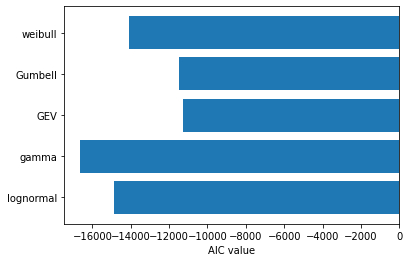

In [ ]:
  plt.barh(dist,AIC_score)
  plt.xlabel('AIC value')